# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [59]:
# your code here
def rolld6(number_of_rolls):
    return [random.randint(1,6) for _ in range(number_of_rolls)]

In [60]:
df = pd.DataFrame(rolld6(10))

In [61]:
df

,0
0,4
1,5
2,5
3,2
4,6
5,4
6,6
7,1
8,2
9,4


#### 2.- Plot the results sorted by value.

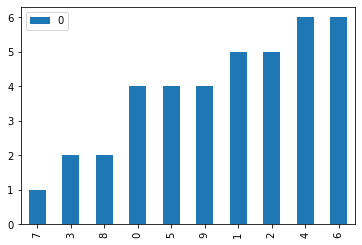

In [62]:
# your code here
df.sort_values(0).plot(kind='bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [63]:
# your code here
sorted_index = df[0].sort_values(0).value_counts().reset_index().sort_values('index')
sorted_index.index = sorted_index['index']
sorted_index.drop('index', axis=1, inplace=True)
sorted_index.columns = ['freq']
sorted_index['freq'].astype(int, copy=False)

index
1    1
2    2
4    3
5    2
6    2
Name: freq, dtype: int64

In [64]:
sorted_index

,freq
index,
1,1
2,2
4,3
5,2
6,2


In [65]:
"""
Sorting the values and then plotting it doesn't really give us any useful information since it's just showing which value
came out for each throw. The freq. distributon actually shows how many times each number came out.
"""

"\nSorting the values and then plotting it doesn't really give us any useful information since it's just showing which value\ncame out for each throw. The freq. distributon actually shows how many times each number came out.\n"

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [66]:
# your code here
def mean2(lst):
    return sum(lst)/len(lst)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [67]:
# your code here
mean2(sorted_index['freq'])

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [68]:
# your code here
def median2(lst):
    sorted_lst = sorted(lst)
    if len(lst) % 2:
        return (sorted_lst[len(sorted_lst)/2] + sorted_lst[len(sorted_lst)/2 + 1])
    else:
        return sorted_lst[round(len(sorted_lst)/2) + 1]

In [69]:
median2(df[0].to_list())

5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [70]:
# your code here
def quartiles(lst):
    Q2 = median2(lst)
    middle_index = len(lst)//2
    half1 = lst[:middle_index]
    half2 = lst[middle_index:]
    return [half1[len(half1)//2], Q2, half2[len(half2)//2]]

In [71]:
quartiles(df[0].to_list())

[5, 5, 1]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [72]:
# your code here
df = pd.read_csv('/home/emanuele/Desktop/IronHack/Labs/Week4/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv')

In [73]:
df.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [74]:
all(df['Unnamed: 0'] == df['roll'])

True

In [75]:
df.drop('Unnamed: 0', axis=1, inplace=True)

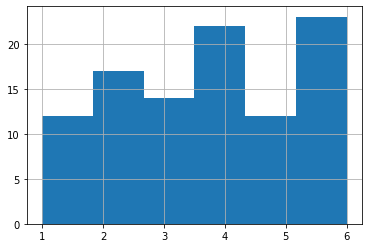

In [76]:
df['value'].hist(bins=6)

In [77]:
"""
There's a lot of 4s and 6s. This is a deviation from the mean that can happen with a sample of 100
"""

"\nThere's a lot of 4s and 6s. This is a deviation from the mean that can happen with a sample of 100\n"

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [78]:
# your code here
mean2(df['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [79]:
# your code here
freq = df['value'].value_counts()
freq

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [80]:
df.head()

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6


(array([12., 17., 14., 22., 12., 23.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

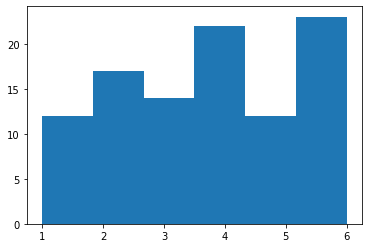

In [81]:
# your code here
plt.hist(df['value'], bins=6)

In [82]:
"""
Again, most of the rolls resulted in a 5 or a 6 which explains the higher-than-expected mean, which would be 3.5 for a d6
"""

'\nAgain, most of the rolls resulted in a 5 or a 6 which explains the higher-than-expected mean, which would be 3.5 for a d6\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [83]:
# your code here
df = pd.read_csv('/home/emanuele/Desktop/IronHack/Labs/Week4/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv')

In [84]:
freq = df['value'].value_counts()
freq

3    175
1    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

(array([175., 167., 175., 168., 149., 166.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

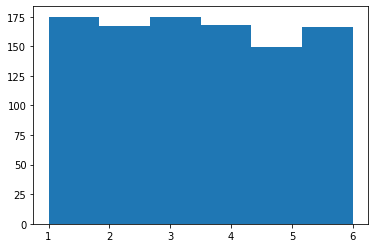

In [85]:
plt.hist(df['value'], bins=6)

In [86]:
"""
Increasing the number of rolls means that the distribution gets more flat since it approaches the true mean,
which could not be shown with a low number of rolls given the effect of randomness"""

'\nIncreasing the number of rolls means that the distribution gets more flat since it approaches the true mean,\nwhich could not be shown with a low number of rolls given the effect of randomness'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [129]:
# your code here
df = pd.read_csv('/home/emanuele/Desktop/IronHack/Labs/Week4/lab-understanding-descriptive-stats/data/ages_population.csv')

In [130]:
freq = df['observation'].value_counts()

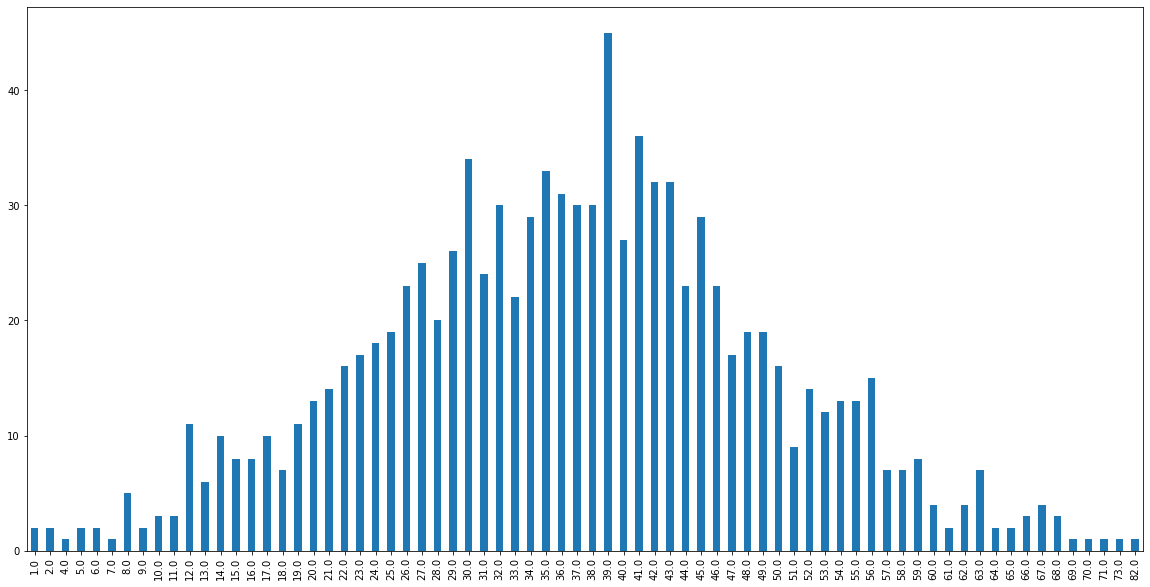

In [131]:
freq.sort_index().plot(kind='bar',figsize=(20,10))

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [132]:
# your code here
mean2(df.observation)

36.56

In [133]:
df.observation.std()

12.81649962597677

In [134]:
"""
The mean was quite easy to guess given that the plot follows a very normal-like shape, the std not really but
that's more lack of experience than anything
"""

"\nThe mean was quite easy to guess given that the plot follows a very normal-like shape, the std not really but\nthat's more lack of experience than anything\n"

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [137]:
# your code here
df = pd.read_csv('/home/emanuele/Desktop/IronHack/Labs/Week4/lab-understanding-descriptive-stats/data/ages_population2.csv')

In [138]:
freq = df['observation'].value_counts()

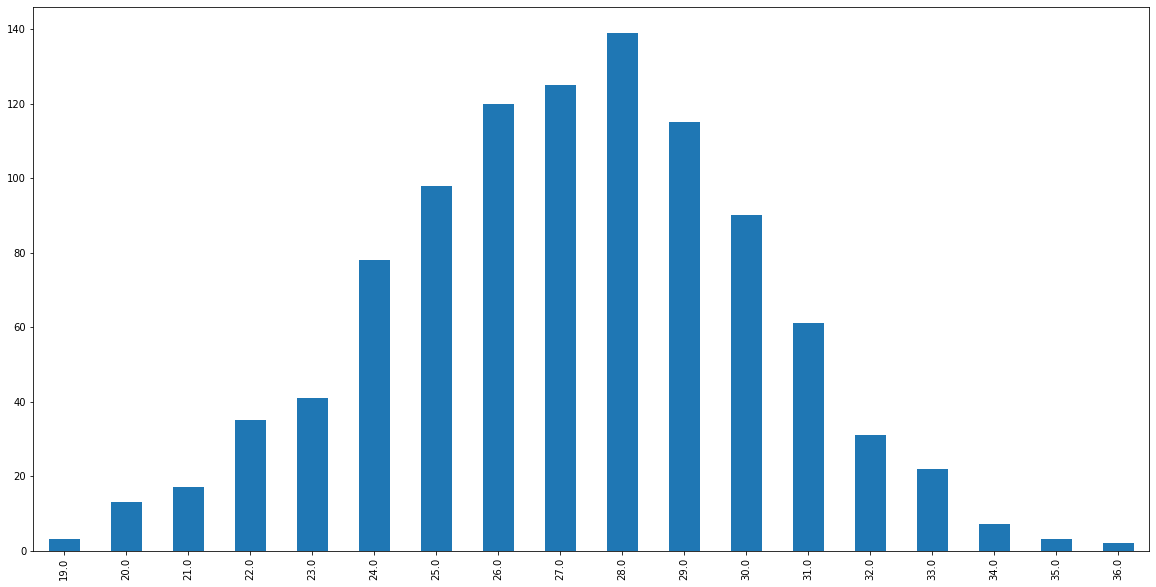

In [139]:
freq.sort_index().plot(kind='bar',figsize=(20,10))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [140]:
"""
The results are way more bunched up showing a younger population with a variance that is extremely lower than the first population.
where a lot of people have an age that is closer to the mean compared to step 1
"""

'\nThe results are way more bunched up showing a younger population with a variance that is extremely lower than the first population.\nwhere a lot of people have an age that is closer to the mean compared to step 1\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [141]:
# your code here
df.mean()

observation    27.155
dtype: float64

In [142]:
df.std()

observation    2.969814
dtype: float64

In [143]:
"""
The values confirm what the plot is showing, especially the standard deviation"""

'\nThe values confirm what the plot is showing, especially the standard deviation'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [8]:
# your code here
df = pd.read_csv('/home/emanuele/Desktop/IronHack/Labs/Week4/lab-understanding-descriptive-stats/data/ages_population3.csv')

In [9]:
freq = df['observation'].value_counts()

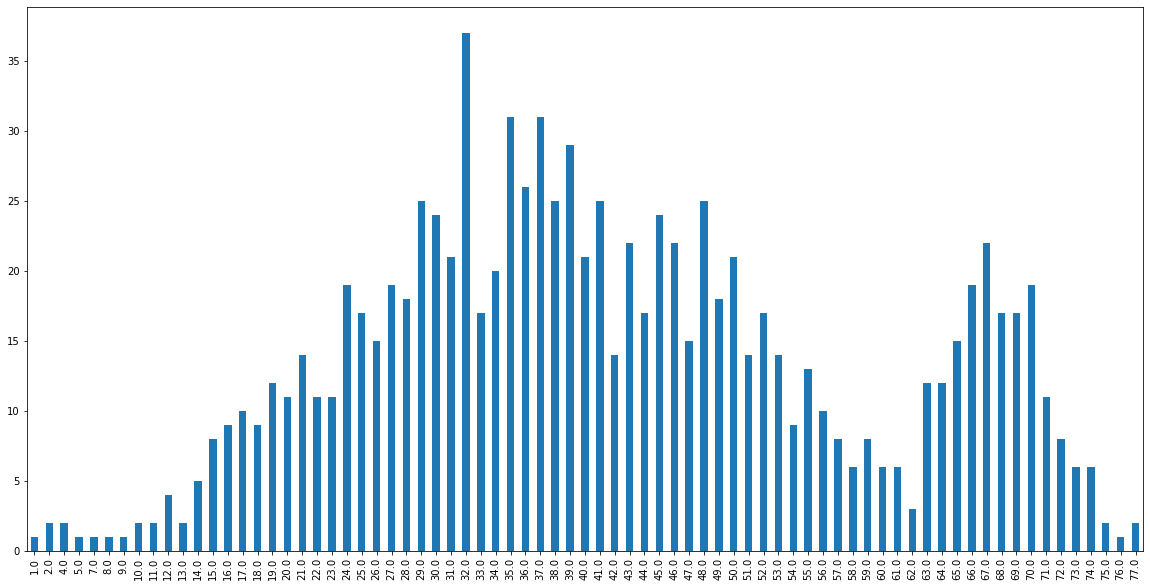

In [10]:
freq.sort_index().plot(kind='bar',figsize=(20,10))

###### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [147]:
# your code here
df.mean()

observation    41.989
dtype: float64

In [148]:
df.std()

observation    16.144706
dtype: float64

In [11]:
"""
I would have expected the mean to be higher considering the small peaks in the 63-73 age area but the high std was expected
"""

'\nI would have expected the mean to be higher considering the small peaks in the 63-73 age area but the high std was expected\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [14]:
# your code here
df.quantile([0.25, 0.5, 0.75])

,observation
0.25,30.0
0.50,40.0
0.75,53.0


In [15]:
"""
The median and the mean are really close to each other which it's surprising the mean considering the peaks in the 
higher age area, but the fact that the third quantile is 53 is compatible with that peak
"""

"\nThe median and the mean are really close to each other which it's surprising the mean considering the peaks in the \nhigher age area, but the fact that the third quantile is 53 is compatible with that peak\n"

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [16]:
# your code here
df.quantile([0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875])

,observation
0.125,24.0
0.250,30.0
0.375,35.0
0.500,40.0
0.625,46.0
0.750,53.0
0.875,66.0


In [ ]:
"""
Adding more percentiles shows the peaks in the higher age area more easily since the difference between the 0.50
and the 0.125 percentile is only 16 points while the difference between 0.50 and 0.875 (the mirror percentile of 0.125)
is 26."""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""